# Big Data & Machine Learning nella supply chain ittica

## Data Preparation

In [106]:
import json
import pandas as pd

with open("export_total_db.json", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data["rows"])
df.head()

,id,stato_vendita,Codice_Azienda,CF_Azienda,PIva_Azienda,Ragione_Sociale_Azienda,Indirizzo_Sede_Legale_Azienda,Codice_Produttore,CF_Produttore,PIva_Produttore,...,Taglia_Minima,Taglia_Unita,Taglia_Vendibile_Singolarmente_Flag,Progressivo_Partita,Partita,Dettaglio_Data_Sbarco,Dettaglio_Qualita,Dettaglio_Qualita_Descrizione,Dettaglio_Calibro_Taglia_Minima,Dettaglio_Calibro_Taglia_Unita
0,1,VENDUTA,M000,02121150672,02121150672,Mercato Ittico Giulianova Soc. Cons. A.R.L,"Viale Pindaro, 14, 65127, Pescara, TE, It...",PTEST,00000000011,00000000011,...,10,10,0,2.0,ITA000000001/18.06.2025/00002,2025-06-18 00:00:00,Q001,I Qualità,10,10
1,2,VENDUTA,M000,02121150672,02121150672,Mercato Ittico Giulianova Soc. Cons. A.R.L,"Viale Pindaro, 14, 65127, Pescara, TE, It...",PTEST,00000000011,00000000011,...,10,20,0,3.0,ITA000000001/18.06.2025/00003,2025-06-18 00:00:00,Q001,I Qualità,10,20
2,3,VENDUTA,M000,02121150672,02121150672,Mercato Ittico Giulianova Soc. Cons. A.R.L,"Viale Pindaro, 14, 65127, Pescara, TE, It...",PTEST,00000000011,00000000011,...,10,20,0,4.0,ITA000000001/18.06.2025/00004,2025-06-18 00:00:00,Q001,I Qualità,10,20
3,4,VENDUTA,M000,02121150672,02121150672,Mercato Ittico Giulianova Soc. Cons. A.R.L,"Viale Pindaro, 14, 65127, Pescara, TE, It...",PTEST,00000000011,00000000011,...,0,0,0,5.0,ITA000000001/18.06.2025/00005,2025-06-18 00:00:00,Q001,I Qualità,0,0
4,5,VENDUTA,M000,02121150672,02121150672,Mercato Ittico Giulianova Soc. Cons. A.R.L,"Viale Pindaro, 14, 65127, Pescara, TE, It...",PTEST,00000000011,00000000011,...,10,20,0,6.0,ITA000000001/18.06.2025/00006,2025-06-18 00:00:00,Q001,I Qualità,10,20


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19089 entries, 0 to 19088
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data_Vendita           19089 non-null  datetime64[ns]
 1   Modalita_Acquisto      19089 non-null  object        
 2   Peso_Netto             19089 non-null  float64       
 3   Peso_Lordo             19089 non-null  float64       
 4   Prezzo_Unitario        19089 non-null  float64       
 5   Prezzo_Totale          19089 non-null  float64       
 6   Codice_Attrezzatura    19089 non-null  object        
 7   ZonaFao_GSA_Codice     19089 non-null  object        
 8   Codice_Specie_FAO      19089 non-null  object        
 9   Dettaglio_Data_Sbarco  19018 non-null  datetime64[ns]
 10  Dettaglio_Qualita      19089 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 1.6+ MB


In [107]:
df["Data_Vendita"] = pd.to_datetime(df["Data_Vendita"])
df["Dettaglio_Data_Sbarco"] = pd.to_datetime(df["Dettaglio_Data_Sbarco"])

In [108]:
#Gestione dei valori mancanti
#Mostro solamente le variabili la cui percentuale di valori mancanti è sopra il 50%, in modo tale da sapere quali eliminare

missing_percentage = df.isnull().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 50] \
    .sort_values(ascending=False)

missing_percentage

Data_Sbarco                      100.000000
Nome_Sito_Produttivo              99.994761
Codice_Sito_Produttivo            99.994761
Codice_Metodo_Produzione          99.994761
Descrizione_Metodo_Produzione     99.994761
Lotto                             99.994761
Ingredienti                       99.994761
dtype: float64

In [109]:
selected_features = [
    "Data_Vendita",
    "Modalita_Acquisto",
    "Peso_Netto",
    "Peso_Lordo",
    "Prezzo_Unitario",
    "Prezzo_Totale",
    "Codice_Attrezzatura",
    "ZonaFao_GSA_Codice",
    "Codice_Specie_FAO",
    "Dettaglio_Data_Sbarco",
    "Dettaglio_Qualita"
]

df = df[selected_features]

In [110]:
# 1.3 Controlli di coerenza minimi (dati "impossibili")
# - target mancante: non utilizzabile in analisi del target
# - prezzi/pesi negativi: errori di inserimento
# - peso lordo < peso netto: incoerenza

df = df.dropna(subset=["Prezzo_Unitario"]).copy()

df = df[df["Prezzo_Unitario"] >= 0]

if "Peso_Netto" in df.columns:
    df = df[df["Peso_Netto"].isna() | (df["Peso_Netto"] >= 0)]

if "Peso_Lordo" in df.columns:
    df = df[df["Peso_Lordo"].isna() | (df["Peso_Lordo"] >= 0)]

if "Peso_Lordo" in df.columns and "Peso_Netto" in df.columns:
    df = df[
        df["Peso_Lordo"].isna()
        | df["Peso_Netto"].isna()
        | (df["Peso_Lordo"] >= df["Peso_Netto"])
    ]

df.head()

,Data_Vendita,Modalita_Acquisto,Peso_Netto,Peso_Lordo,Prezzo_Unitario,Prezzo_Totale,Codice_Attrezzatura,ZonaFao_GSA_Codice,Codice_Specie_FAO,Dettaglio_Data_Sbarco,Dettaglio_Qualita
0,2025-06-19 13:31:40,SALA,8.7,9.0,65.9,573.33,OTB,37.2.1-18,ZZZ,2025-06-18,Q001
1,2025-06-19 13:40:16,SALA,9.0,9.5,8.5,76.50,OTB,37.2.1-18,ELE,2025-06-18,Q001
2,2025-06-19 13:59:30,SALA,9.7,10.0,49.5,480.15,OTB,37.2.1-18,NEP,2025-06-18,Q001
3,2025-06-19 14:02:08,SALA,1.7,2.0,26.6,45.22,OTB,37.2.1-18,TGS,2025-06-18,Q001
4,2025-06-19 15:59:27,SALA,10.0,10.5,5.6,56.00,OTB,37.2.1-18,EOI,2025-06-18,Q001


## Exploratory Data Analysis (EDA)  

In [122]:
df['Prezzo_Unitario'].describe()

count    19089.000000
mean         6.533539
std          6.969224
min          0.000000
25%          2.300000
50%          5.000000
75%          8.550000
max        200.000000
Name: Prezzo_Unitario, dtype: float64

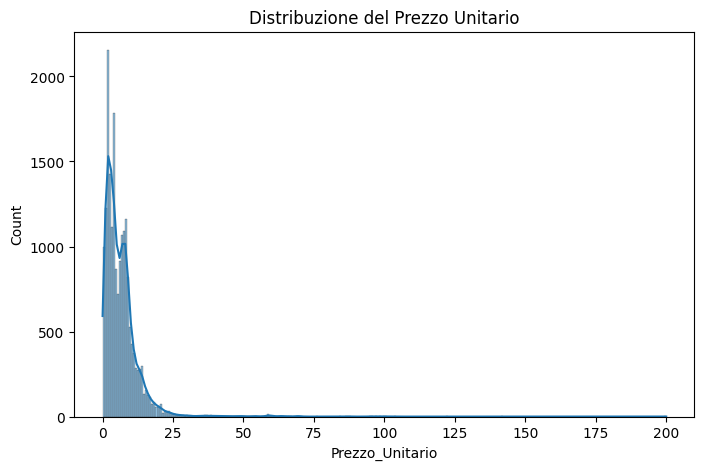

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

#Interpretazione del prezzo unitario
plt.figure(figsize=(8,5))
sns.histplot(df["Prezzo_Unitario"], kde=True)
plt.title("Distribuzione del Prezzo Unitario")
plt.show()

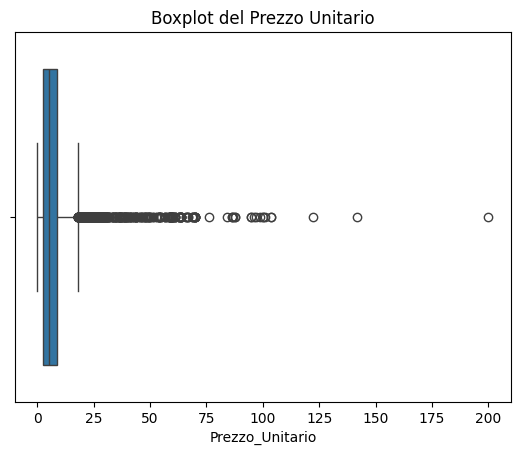

In [113]:
# Boxplot del prezzo unitario
plt.figure()
sns.boxplot(x=df["Prezzo_Unitario"])
plt.title("Boxplot del Prezzo Unitario")
plt.show()

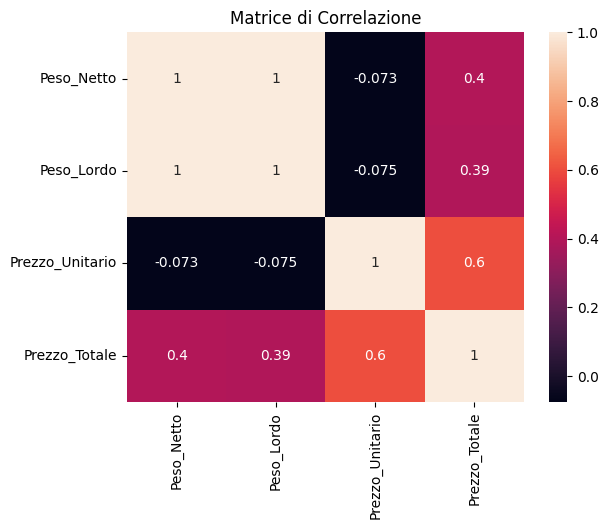

In [114]:
# Matrice di correlazione
corr = df[[
    "Peso_Netto", "Peso_Lordo", 
    "Prezzo_Unitario", "Prezzo_Totale"
]].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Matrice di Correlazione")
plt.show()

In [121]:
#Dato che il peso lordo ha correlazione pari ad 1 con peso_netto, possiamo toglierla in quanto ci sarà multicollinearità.
selected_features.remove('Peso_Lordo')

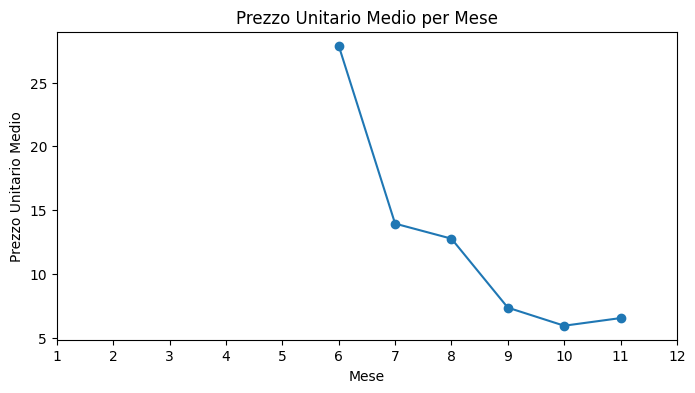

Mese
6     27.890000
7     13.939320
8     12.757895
9      7.350344
10     5.931321
11     6.531087
Name: Prezzo_Unitario, dtype: float64

In [94]:
# 2.4 Analisi temporale minima: prezzo medio per mese (stagionalità)
# (Difendibile perché collega l'EDA a feature engineering e al dominio: effetti stagionali.)
df_time = df.dropna(subset=["Data_Vendita"]).copy()
df_time["Mese"] = df_time["Data_Vendita"].dt.month

monthly_price = df_time.groupby("Mese")["Prezzo_Unitario"].mean().sort_index()

plt.figure(figsize=(8,4))
plt.plot(monthly_price.index, monthly_price.values, marker="o")
plt.title("Prezzo Unitario Medio per Mese")
plt.xlabel("Mese")
plt.ylabel("Prezzo Unitario Medio")
plt.xticks(range(1,13))
plt.show()

monthly_price

## Feature Engineering

In [98]:
#Creazione di variabili temporali

df_fe = df.copy()

df_fe["Anno"] = df_fe["Data_Vendita"].dt.year
df_fe["Mese"] = df_fe["Data_Vendita"].dt.month
df_fe["Giorno_Settimana"] = df_fe["Data_Vendita"].dt.dayofweek

df_fe.head()

,Data_Vendita,Modalita_Acquisto,Peso_Netto,Peso_Lordo,Prezzo_Unitario,Prezzo_Totale,Codice_Attrezzatura,ZonaFao_GSA_Codice,Codice_Specie_FAO,Dettaglio_Data_Sbarco,Dettaglio_Qualita,Anno,Mese,Giorno_Settimana
0,2025-06-19 13:31:40,SALA,8.7,9.0,65.9,573.33,OTB,37.2.1-18,ZZZ,2025-06-18,Q001,2025,6,3
1,2025-06-19 13:40:16,SALA,9.0,9.5,8.5,76.50,OTB,37.2.1-18,ELE,2025-06-18,Q001,2025,6,3
2,2025-06-19 13:59:30,SALA,9.7,10.0,49.5,480.15,OTB,37.2.1-18,NEP,2025-06-18,Q001,2025,6,3
3,2025-06-19 14:02:08,SALA,1.7,2.0,26.6,45.22,OTB,37.2.1-18,TGS,2025-06-18,Q001,2025,6,3
4,2025-06-19 15:59:27,SALA,10.0,10.5,5.6,56.00,OTB,37.2.1-18,EOI,2025-06-18,Q001,2025,6,3


In [83]:
#Trasformazione logaritmica della variabile target

import numpy as np

df["Prezzo_Unitario_Log"] = np.log1p(df["Prezzo_Unitario"])

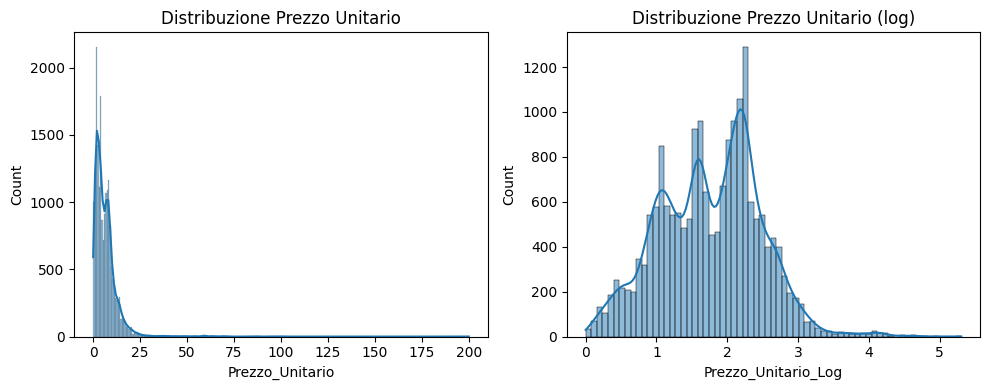

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df["Prezzo_Unitario"], kde=True)
plt.title("Distribuzione Prezzo Unitario")

plt.subplot(1,2,2)
sns.histplot(df["Prezzo_Unitario_Log"], kde=True)
plt.title("Distribuzione Prezzo Unitario (log)")

plt.tight_layout()
plt.show()

In [ ]:
#Dummy da giungno ad agosto -> estate; settembre a novembre -> autunno 

In [73]:
#Encoding delle variabili categoriali
df_encoded = pd.get_dummies(
    df,
    columns=["ZonaFao_GSA_Codice", "Dettaglio_Qualita", "Codice_Attrezzatura"],
    drop_first=True
)

In [125]:
conteggio_transazioni = df['Codice_Specie_FAO'].value_counts()
conteggio_transazioni

Codice_Specie_FAO
TGS    3513
HKE    3060
MTS    2742
MUT    2055
DPS    1262
       ... 
ARY       1
WEG       1
OOA       1
PAC       1
UNG       1
Name: count, Length: 152, dtype: int64

In [134]:
valori = ["TGS", "HKE", "MTS"]
df_NN = df[df["Codice_Specie_FAO"].isin(valori)]


In [140]:
import numpy as np
import pandas as pd

# Strumenti scikit-learn per:
# - dividere il dataset in train/test
# - fare preprocessing diverso per colonne numeriche e categoriche
# - costruire pipeline
# - valutare il modello con metriche utili
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow/Keras per definire e allenare la rete neurale
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/332.0 MB 10.6 MB/s eta 0:00:32
    --------------------------------------- 4.2/332.0 MB 10.6 MB/s eta 0:00:31
    --------------------------------------- 6.6/332.0 MB 10.5 MB/s eta 0:00:31
   - -------------------------------------- 8.7/332.0 MB 10.5 MB/s eta 0:00:31
   - -------------------------------------- 11.0/332.0 MB 10.5 MB/s eta 0:00:31
   - -------------------------------------- 13.1/332.0 MB 10.5 MB/s eta 0:00:31
   - -------------------------------------- 15.2/332.0 MB 10.5 MB/s eta 0:00:31
   -- ------------------------------------- 17.6/332.0 MB 10.5 MB/s eta 0:00:30
   -- ------------------------------------- 19.7/332.0 MB 10.5 MB/s eta 0:00:30
   -- ------------------------------------- 21.8/332.0 MB 10.5 MB/s eta 0:00:30
   -- ------------------------------------- 23.9/332.0 

In [144]:
# --- 1) separa X e y ---
# df = ...  # il tuo dataframe
target_col = "Codice_Specie_FAO"

# X contiene tutte le colonne tranne la target
X = df_NN.drop(columns=[target_col]).copy()

# y_raw contiene la target (convertita a stringa per sicurezza)
# (utile se la colonna ha codici misti tipo numeri+stringhe)
y_raw = df_NN[target_col].astype(str).copy()

In [145]:
# --- 2) label encoding della target (3 classi) ---
le = LabelEncoder()

# Trasforma ad esempio: ["COD1","COD2","COD3"] -> [0,1,2]
y = le.fit_transform(y_raw)

# Numero di classi totali (qui dovrebbe essere 3)
n_classes = len(le.classes_)

# Stampa le classi nell'ordine usato dal modello
print("Classi:", list(le.classes_))

Classi: ['HKE', 'MTS', 'TGS']


In [146]:
# --- 3) individua colonne numeriche e categoriche ---
# Prende come numeriche tutte le colonne con dtype numerico
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Tutte le altre le considera categoriche
cat_cols = [c for c in X.columns if c not in num_cols]

In [147]:
# --- 4) split stratificato ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% per test
    random_state=42,      # riproducibilità
    stratify=y            # mantiene le proporzioni delle classi
)

In [148]:
# --- 5) preprocessing ---
preprocess = ColumnTransformer(
    transformers=[
        # Pipeline per le colonne numeriche:
        # StandardScaler: centra (media=0) e scala (dev std=1)
        ("num", Pipeline(steps=[
            ("scaler", StandardScaler())
        ]), num_cols),

        # Pipeline per categoriche:
        # OneHotEncoder: crea colonne 0/1 per ogni categoria
        # handle_unknown="ignore": se in test appare una categoria nuova, non crasha
        ("cat", Pipeline(steps=[
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"  # ignora eventuali colonne non specificate
)

In [149]:
# fit_transform solo su train: qui "impara" scaling e categorie
X_train_p = preprocess.fit_transform(X_train)

# transform su test: applica le stesse trasformazioni senza "imparare" nulla
X_test_p  = preprocess.transform(X_test)

In [150]:
# Keras lavora bene con float32 dense; se ti esce sparse matrix, convertila
def to_dense_float32(M):
    # Se M ha il metodo toarray(), è una sparse matrix: la convertiamo in array denso
    if hasattr(M, "toarray"):
        M = M.toarray()
    # Keras/TensorFlow preferisce float32 per performance
    return M.astype("float32")

X_train_p = to_dense_float32(X_train_p)
X_test_p  = to_dense_float32(X_test_p)

In [152]:
input_dim = X_train_p.shape[1]
input_dim

7275

In [153]:
# --- 6) modello feed-forward (MLP) ---
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),          # dimensione input = numero feature preprocessate
    layers.Dense(256, activation="relu"),      # layer fully-connected
    layers.Dropout(0.3),                       # spegne casualmente il 30% dei neuroni durante training
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation="softmax")  # output = 3 classi, softmax -> distribuzione di probabilità
])

In [154]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [155]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",          # controlla la loss su validation
        patience=10,                 # aspetta 10 epoche senza miglioramento prima di fermare
        restore_best_weights=True    # torna ai pesi migliori
    )
]

In [158]:
history = model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9977 - loss: 0.0144 - val_accuracy: 0.9088 - val_loss: 0.2514
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9973 - loss: 0.0101 - val_accuracy: 0.9142 - val_loss: 0.2358
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9074 - val_loss: 0.2814
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9971 - loss: 0.0077 - val_accuracy: 0.9054 - val_loss: 0.3161
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9061 - val_loss: 0.2836
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9978 - loss: 0.0059 - val_accuracy: 0.8981 - val_loss: 0.2976
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9162 - val_loss: 0.2643
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9987 - loss: 0.0051 - val_accuracy: 0.8538 - v

In [159]:
# --- 7) valutazione ---
test_loss, test_acc = model.evaluate(X_test_p, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9082


In [160]:
y_proba = model.predict(X_test_p, verbose=0)   # shape: (n_samples, 3)
y_pred = np.argmax(y_proba, axis=1)           # classe predetta come indice 0/1/2

In [161]:
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))



Classification report:
              precision    recall  f1-score   support

         HKE       0.90      0.86      0.88       612
         MTS       0.92      0.93      0.92       548
         TGS       0.91      0.94      0.92       703

    accuracy                           0.91      1863
   macro avg       0.91      0.91      0.91      1863
weighted avg       0.91      0.91      0.91      1863


Confusion matrix:
[[525  33  54]
 [ 26 509  13]
 [ 33  12 658]]
